# Big Ideas Final Project

## Introduction

Our final project asks us to find the \"best neighborhood in Pittsburgh\" using data from the WPRDC database. Our inital approach to this project was to find the neighborhood that would provide the best quality of life to its residents. We did not have issue finding submetrics to base this metric on: the best neighborhood to live in is the on that is the safest, cheapest, and most visually appealing. We considered alternatives like amounts of pollution, recycling, or simply how environmentally mindful a negihborhood as well, but we ultimately decided that the datasets in the categories would not give convincing statistical information. Therefore, we decided that the best neighborhood is the one with the most livable qualities.

## The Metric

The main metric we used to determine the best neighborhood in the City of Pittsburgh is overall quality of life. To do this, we used 3 sub-metrics: safety, affordability, and environment. We believed the neighborhood people will most want to live in is the one where people feel the most secure, can reasonably live, and has a beautfiul appearance.

### Safety
In order to determine how safe a neighborhood is, we utilized a dataset that tracks information about arrests. The arrest data contains information on people taken into custody by City of Pittsburgh police officers. More serious crimes such as felony offenses are more likely to result in an arrest. However, arrests can occur as a result of other offenses, such as parole violations or a failure to appear for trial. All data is reported at the block/intersection level, with the exception of sex crimes, which are reported at the police zone level. We used the logic that the fewer the arrests in a neighborhood, the safer that neighborhood is. 

### Affordability
To determine the affordability of a neighborhood, we used a dataset that included the estimated total rent price. Aggregate contract rent is calculated by adding all of the contract rents for occupied housing units in an area. Aggregate contract rent is rounded to the nearest hundred dollars. This explanation is comparable to the description used for Aggregate Gross Rent. The lower the average rent price, roughly the more affordable the neighborhood is. 

### Environment
Finally, to decide the quality of the environment in a neighborhood, we used a dataset which logged each tree in a neighborhood that is cared for and managed by the City of Pittsburgh Department of Public Works Forestry Division. The neighborhoods with the highest number of trees are the best for the environemnt, and are typically the most visually appealing. 

## The Best Neighborhood

Allegheny West, while not the absolute lowest, has the 20th lowest amount of arrests in the 90 neighborhoods in Pittsburgh.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Reading the csv file
arrest_data = pd.read_csv("City of Pittsburgh Arrest Data Set.csv")

# Count the number of arrests per neighborhood
arrest_counts = arrest_data["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending=True)

# Display the neighborhoods with the least amount of arrests
arrest_counts.head(30)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Ridgemont                       37
Regent Square                   37
New Homestead                   39
Swisshelm Park                  43
Chartiers City                  46
East Carnegie                   48
St. Clair                       55
Outside County                  57
Outside State                   67
Summer Hill                     76
Oakwood                         82
Golden Triangle/Civic Arena     83
Hays                           120
Windgap                        124
Mount Oliver                   124
Fairywood                      127
Allegheny West                 130
Arlington Heights              155
Polish Hill                    166
Glen Hazel                     169
Friendship                     174
Morningside                    188
Upper Lawrenceville            189
Duquesne Heights               191

Allegheny West has the 10th lowest average aggregate rent cost of the 90 neighborhoods in Pittsburgh.

In [2]:
contract_rent_data = pd.read_csv("City of Pittsburgh Contract Rent.csv")

# Calculate the average estimate total for every neighborhood
average_estimates = contract_rent_data.groupby("Neighborhood")["Estimate; Total:"].mean()
average_estimates_sorted = average_estimates.sort_values(ascending=True)

# display values
average_estimates_sorted.head(10)

Neighborhood
Chateau            0.0
New Homestead      4.0
South Shore        8.0
Ridgemont         26.0
Esplen            34.0
Bon Air           46.0
Chartiers City    49.0
St. Clair         52.0
Swisshelm Park    60.0
Allegheny West    73.0
Name: Estimate; Total:, dtype: float64

Contract Rent Graph

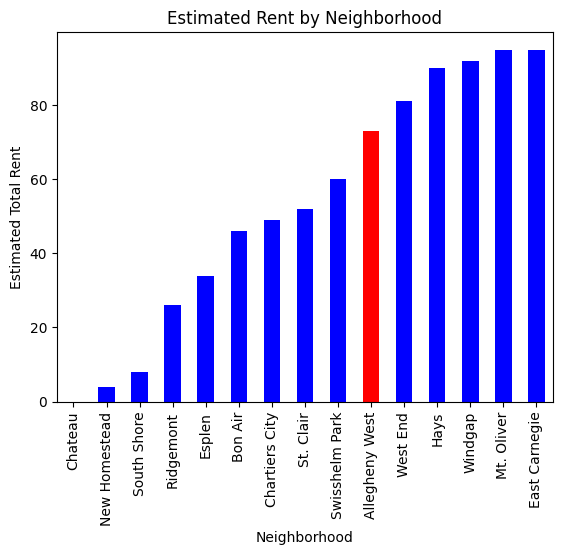

In [5]:
#focus on only neighborhood and estimated rent totals
focused_rent_data = contract_rent_data.loc[:, ["Neighborhood", "Estimate; Total:"]]

#find the average estimated rent for each neighborhood
average_estimates = focused_rent_data.groupby("Neighborhood")["Estimate; Total:"].mean()

#sort neighborhoods from least expensive rent to most expensive
sorted_estimates = average_estimates.sort_values(ascending=True)

# plot the cheapest 15 neighborhoods
rent_to_plot = sorted_estimates[:15]

plt.title("Estimated Rent by Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Estimated Total Rent")

colors = ['b']

ax = rent_to_plot.plot(kind='bar', color=colors, legend=False)

highlight = 'Allegheny West'
pos = rent_to_plot.index.get_loc(highlight)

ax.patches[pos].set_facecolor('r')

plt.show()

Allegheny West has the 41st most trees in the city. While not that high, it's the neighborhood that meets the most of the data-driven metrics we've made.

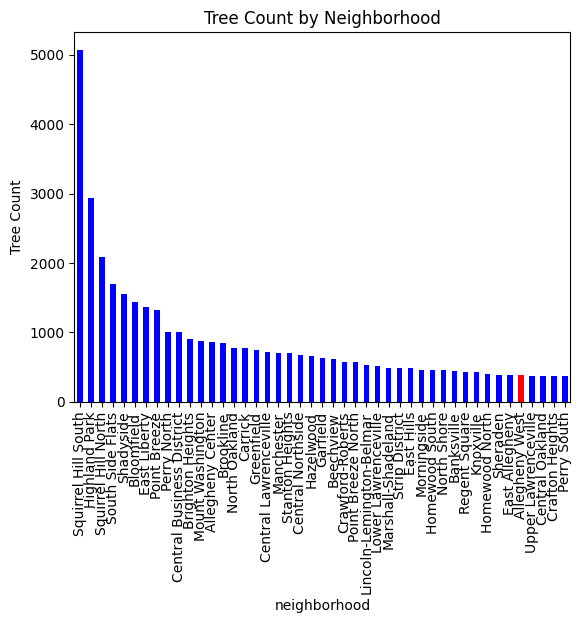

In [6]:
tree_data = pd.read_csv("City of Pittsburgh Trees.csv", usecols=["id", "neighborhood", "height", "width", "stems"])

# finding neighborhoods with the most trees
tree_counts = tree_data["neighborhood"].value_counts().sort_values(ascending=False)

tree_counts_to_plot = tree_counts[:45]

# plot
plt.title("Tree Count by Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Tree Count")

colors = ['b']

ax = tree_counts_to_plot.plot(kind='bar', color=colors, legend=False)

highlight = 'Allegheny West'
pos = tree_counts_to_plot.index.get_loc(highlight)

ax.patches[pos].set_facecolor('r')

plt.show()

## Results
We came to the conclusion that Allegheny West is the best neighborhood in the City of Pittsburgh because it has the highest quality of life. We determined this because Allegheny West was the ony neighborhood that performed well in all of our sub-metrics. When it comes to safety, Allegheny West ranks 20th when it comes to the number of arrests out of the 90 neighborhoods in Pittsburgh. Additionally, Allegheny West has one of the lowest average aggregate rent costs, ranking 10th out of the 90. Finally, Allegheny West ranks 41st when it comes to the number of trees in the neighborhood. While it does not perform as well environmentally as some of the other neighborhoods, Allegheny West still out ranks over half of the other neighborhoods in Pittsburgh in this metric and is ranked highly enough in the other metrics to deserve the title of 'Best Neighborhood in the City of Pittsburgh'.

![Allegheny West Picture](https://pashekmtr.com/wp-content/uploads/2018/06/4-Allegheny-West-1800x917.jpg)

## Conclusion

### Heather's Conclusion
Based on the data within the datasets we used, we came to the conclusion that Allegheny West is the neighborhood with the best quality of life in the City of Pittsburgh. While I have personally never spent much time in this area, it seems like a good choice due to its standing when it comes to safety, affordability, and the environment. However, my personal favorite neighborhood is Squirrel Hill, as I have spent the most time here and there is a lot to do. However, Squirrel Hill is one of the most expensive neighborhoods in Pittsburgh, so it did not perform well in our metric of affordability, and therefore would not be a good pick for the best neighborhood based on our metrics.

### Joshua's Conclusion
Allegheny West was the neighborhood that hit the most metrics at once. Across our three data sets we looked for one neighborhood that had the lowest arrests while also having low average cost and high amount of trees. No other neighborhood above Allegheny West (except maybe Ridgemont who had lower arrests and lower cost but too few trees) met as many metrics. I haven't been in Pittsburgh long but when I drove by Allegheny West I remember feeling it was a nice looking nieghborhood. The greenery was well placed, the buildings looked a little old, but overall it was very scenic. I'd agree with our assestment for "best neighborhood" in terms of the best neighborhood I'd want to actually live in. 